<a href="https://colab.research.google.com/github/vydobima/Tugas_ImageClassification/blob/main/Tugas_Besar_Bagian_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TUGAS BESAR BAGIAN 4

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Fungsi menghitung pathloss (cost231)
def cos(d,f,tip,ht,hr):

  #f = frekuensi (MHz)
  #tip = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
  
    if f in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif f in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tip=='urban' :
        Cm=0
    elif tip=='suburban' :
        Cm= -2*((np.log10((f/28)**2))-5.4)
    elif tip=='open' :
        Cm= -4.78*(np.log10(f))+18.33*(np.log10(f))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(f)-0.7)*hr-(1.56*np.log10(f)-1.8)
    Lp = Ca+(Cb*np.log10(f))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [15]:
#Fungsi menghitung daya terima
def prx(ptx,pl,gtx,grx):

  Prx = 10**(((10*(np.log10(ptx*1000))) - pl + gtx + grx)/10)

  return Prx

In [16]:
#Fungsi menghitung SNR
def snr(prx,bw):

  No = -174 + 10*(np.log10(bw))
  Snr = prx / (10**(No/10))

  return Snr

In [17]:
#Fungsi menghitung kapasitas
def btr(snr,bw):

  Btr = bw * np.log2(1+snr)

  return Btr

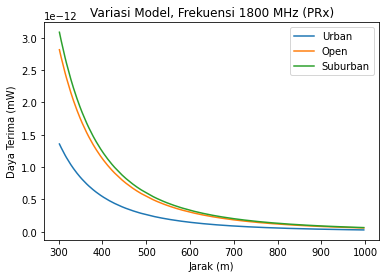

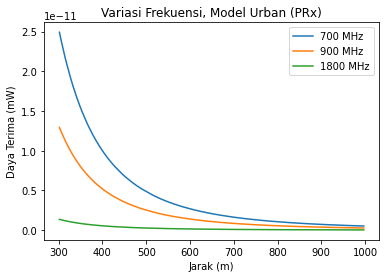

In [18]:
#generate nilai jarak berdasarkan user
jrk=np.random.randint(300,1000,200) #(jarakawal,jarakakhir,jumlahuser)
jrk_sort=jrk[np.argsort(jrk)]

#GRAFIK DAYA TERIMA

#variasi medan daya terima
plossUrban=cos(jrk,1800,'urban',80,1.5) #(jarak(m),frekuensi(MHz),model,tinggiTx(m),tinggiRx(m))
Urban_sort=plossUrban[np.argsort(jrk)]
PRXUrban=prx(30,Urban_sort,10,2) #(dayaTx(watt),pathloss(dB),gainTx(dB),gainRx(dB))

plossSuburban=cos(jrk,1800,'suburban',80,1.5)
Suburban_sort=plossSuburban[np.argsort(jrk)]
PRXSuburban=prx(30,Suburban_sort,10,2)

plossOpen=cos(jrk,1800,'open',80,1.5)
Open_sort=plossOpen[np.argsort(jrk)]
PRXOpen=prx(30,Open_sort,10,2)

plt.figure()
plt.plot(jrk_sort,PRXUrban,label='Urban')
plt.plot(jrk_sort,PRXOpen,label='Open')
plt.plot(jrk_sort,PRXSuburban,label='Suburban')
plt.legend()
plt.title('Variasi Model, Frekuensi 1800 MHz (PRx)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

#variasi frekuensi daya terinma
ploss700=cos(jrk,700,'urban',80,1.5)
f700_sort=ploss700[np.argsort(jrk)]
PRX700=prx(30,f700_sort,10,2)

ploss900=cos(jrk,900,'urban',80,1.5)
f900_sort=ploss900[np.argsort(jrk)]
PRX900=prx(30,f900_sort,10,2)

ploss1800=cos(jrk,1800,'urban',80,1.5)
f1800_sort=ploss1800[np.argsort(jrk)]
PRX1800=prx(30,f1800_sort,10,2)

plt.figure()
plt.plot(jrk_sort,PRX700,label='700 MHz')
plt.plot(jrk_sort,PRX900,label='900 MHz')
plt.plot(jrk_sort,PRX1800,label='1800 MHz')

plt.legend()
plt.title('Variasi Frekuensi, Model Urban (PRx)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

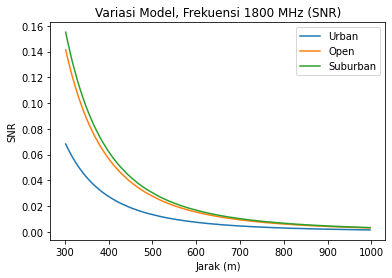

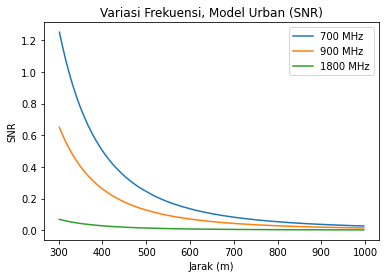

In [19]:
#GRAFIK SNR

#variasi medan SNR
SNRUrban=snr(PRXUrban,5000000) #(dayaterima(numerik),bandwidth(Hz))
SNROpen=snr(PRXOpen,5000000)
SNRSuburban=snr(PRXSuburban,5000000)

plt.figure()
plt.plot(jrk_sort,SNRUrban,label='Urban')
plt.plot(jrk_sort,SNROpen,label='Open')
plt.plot(jrk_sort,SNRSuburban,label='Suburban')
plt.legend()
plt.title('Variasi Model, Frekuensi 1800 MHz (SNR)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

#variasi frekuensi SNR
SNR700=snr(PRX700,5000000)
SNR900=snr(PRX900,5000000)
SNR1800=snr(PRX1800,5000000)

plt.figure()
plt.plot(jrk_sort,SNR700,label='700 MHz')
plt.plot(jrk_sort,SNR900,label='900 MHz')
plt.plot(jrk_sort,SNR1800,label='1800 MHz')
plt.legend()
plt.title('Variasi Frekuensi, Model Urban (SNR)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

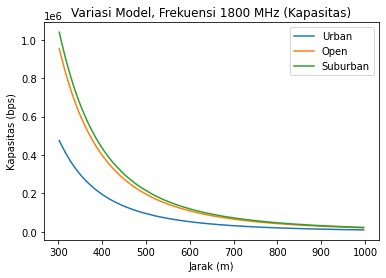

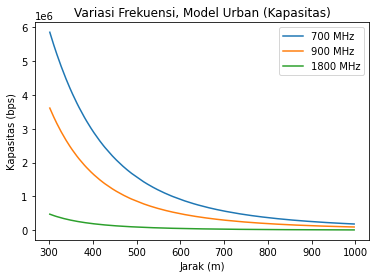

In [20]:
#GRAFIK KAPASITAS

#variasi medan kapasitas
BTRUrban=btr(SNRUrban,5000000) #(snr(numerik),bandwidth(Hz))
BTROpen=btr(SNROpen,5000000)
BTRSuburban=btr(SNRSuburban,5000000)

plt.figure()
plt.plot(jrk_sort,BTRUrban,label='Urban')
plt.plot(jrk_sort,BTROpen,label='Open')
plt.plot(jrk_sort,BTRSuburban,label='Suburban')
plt.legend()
plt.title('Variasi Model, Frekuensi 1800 MHz (Kapasitas)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

#variasi frekuensi kapasitas
BTR700=btr(SNR700,5000000)
BTR900=btr(SNR900,5000000)
BTR1800=btr(SNR1800,5000000)

plt.figure()
plt.plot(jrk_sort,BTR700,label='700 MHz')
plt.plot(jrk_sort,BTR900,label='900 MHz')
plt.plot(jrk_sort,BTR1800,label='1800 MHz')
plt.legend()
plt.title('Variasi Frekuensi, Model Urban (Kapasitas)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()